# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# # Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# # Define an empty list to fetch the weather data for each city
city_data = []

# # Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# # Create counters
record_count = 1
set_count = 1

# # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

#     # Create endpoint URL with each city
        city_url = url + "&q=" + city
    
#     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
    record_count += 1

#     # Run an API request for each of the cities
    try:
#         # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

#         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | invercargill
City not found. Skipping...
Processing Record 2 of Set 1 | lubango
City not found. Skipping...
Processing Record 3 of Set 1 | aasiaat
City not found. Skipping...
Processing Record 4 of Set 1 | tabina
City not found. Skipping...
Processing Record 5 of Set 1 | grytviken
City not found. Skipping...
Processing Record 6 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 7 of Set 1 | xucheng
City not found. Skipping...
Processing Record 8 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 9 of Set 1 | holyhead
City not found. Skipping...
Processing Record 10 of Set 1 | champerico
City not found. Skipping...
Processing Record 11 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 12 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 13 of Set 1 | warwick
City not found. Skipping...
Processing Record 14 of Se

Processing Record 13 of Set 4 | tamanrasset
Processing Record 14 of Set 4 | punta arenas
Processing Record 15 of Set 4 | talnakh
Processing Record 16 of Set 4 | udachny
Processing Record 17 of Set 4 | nichinan
Processing Record 18 of Set 4 | itoman
Processing Record 19 of Set 4 | qaqortoq
Processing Record 20 of Set 4 | sainte-anne-des-monts
Processing Record 21 of Set 4 | amahai
Processing Record 22 of Set 4 | rouyn-noranda
Processing Record 23 of Set 4 | pakxan
Processing Record 24 of Set 4 | taunsa
Processing Record 25 of Set 4 | cabo san lucas
Processing Record 26 of Set 4 | hermanus
Processing Record 27 of Set 4 | salalah
Processing Record 28 of Set 4 | badger
Processing Record 29 of Set 4 | port saint john's
Processing Record 30 of Set 4 | punta umbria
Processing Record 31 of Set 4 | kralendijk
Processing Record 32 of Set 4 | ma'rib
Processing Record 33 of Set 4 | zhanaozen
Processing Record 34 of Set 4 | leava
Processing Record 35 of Set 4 | quellon
Processing Record 36 of Set 4

Processing Record 11 of Set 8 | broome
Processing Record 12 of Set 8 | imbituba
Processing Record 13 of Set 8 | gadzhiyevo
Processing Record 14 of Set 8 | kota kinabalu
Processing Record 15 of Set 8 | figuig (centre)
Processing Record 16 of Set 8 | wellington
Processing Record 17 of Set 8 | kayyerkan
Processing Record 18 of Set 8 | bougouni
Processing Record 19 of Set 8 | mount pearl
Processing Record 20 of Set 8 | castillos
Processing Record 21 of Set 8 | jackson
Processing Record 22 of Set 8 | along
Processing Record 23 of Set 8 | revda
Processing Record 24 of Set 8 | jayapura
Processing Record 25 of Set 8 | pursat
Processing Record 26 of Set 8 | veraval
Processing Record 27 of Set 8 | tanabe
Processing Record 28 of Set 8 | ljusdal
Processing Record 29 of Set 8 | flin flon
Processing Record 30 of Set 8 | cole harbour
Processing Record 31 of Set 8 | sodra sandby
Processing Record 32 of Set 8 | kaa-khem
Processing Record 33 of Set 8 | kapit
Processing Record 34 of Set 8 | cadale
Proces

Processing Record 9 of Set 12 | kiunga
Processing Record 10 of Set 12 | meadow lakes
Processing Record 11 of Set 12 | poteau
Processing Record 12 of Set 12 | volchikha
Processing Record 13 of Set 12 | sirte
Processing Record 14 of Set 12 | santa cruz
Processing Record 15 of Set 12 | yenotayevka
Processing Record 16 of Set 12 | mo i rana
Processing Record 17 of Set 12 | boali
Processing Record 18 of Set 12 | goz beida
Processing Record 19 of Set 12 | tashtagol
Processing Record 20 of Set 12 | sanya
Processing Record 21 of Set 12 | summerside
Processing Record 22 of Set 12 | al khafji
Processing Record 23 of Set 12 | galveston
Processing Record 24 of Set 12 | prakhon chai
Processing Record 25 of Set 12 | kloulklubed
Processing Record 26 of Set 12 | lerwick
Processing Record 27 of Set 12 | aydarken
Processing Record 28 of Set 12 | new philadelphia
Processing Record 29 of Set 12 | mercedes
Processing Record 30 of Set 12 | busalla
Processing Record 31 of Set 12 | toga village
Processing Rec

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          558
Lat           558
Lng           558
Max Temp      558
Humidity      558
Cloudiness    558
Wind Speed    558
Country       558
Date          558
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,papatowai,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
1,mossendjo,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
2,bellary,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
3,port elizabeth,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
4,lihue,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
1,mossendjo,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
2,bellary,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
3,port elizabeth,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
4,lihue,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

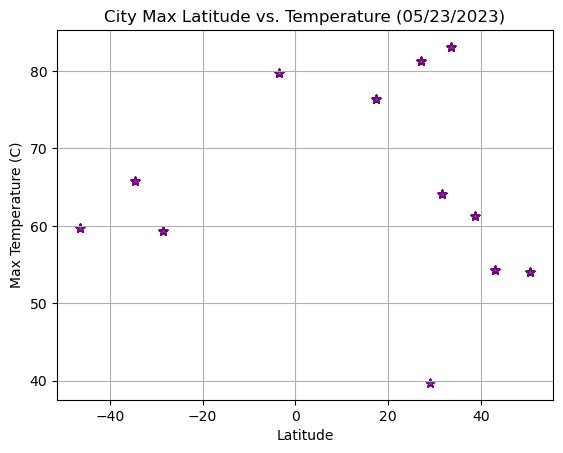

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolor="purple", marker="*", alpha = 1)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (05/25/2023)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

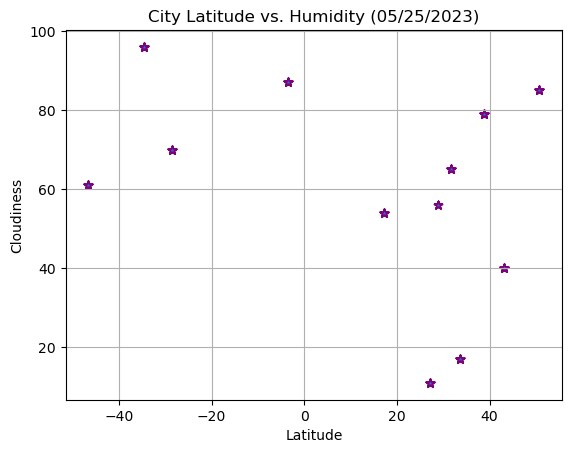

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], edgecolor="purple", marker="*", alpha = 1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (05/25/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

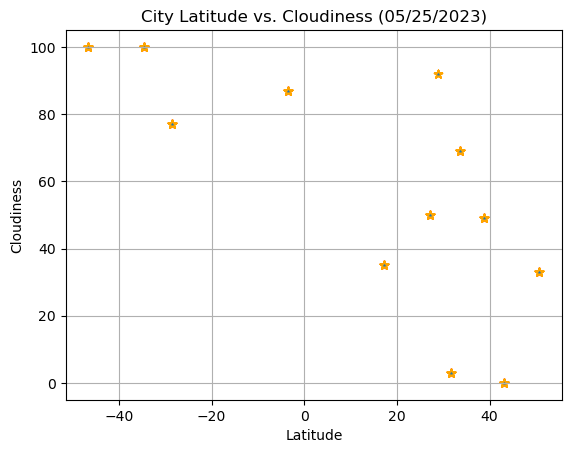

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], edgecolor="orange", marker="*", alpha = 1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (05/25/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

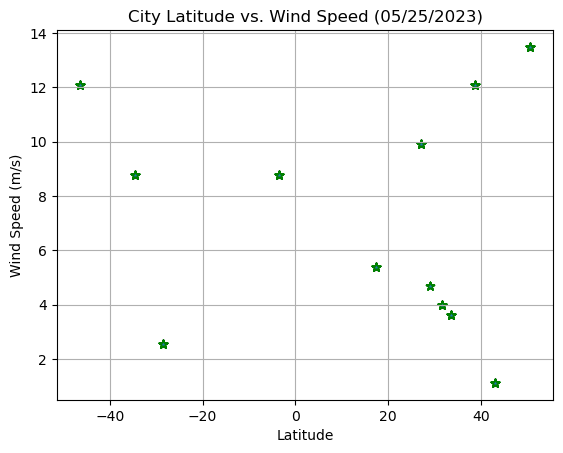

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], edgecolor="green", marker="*", alpha = 1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (05/25/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lnreg(x_values,y_values,coordinates,ylabel,title,figname):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.savefig(figname)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
50,tabas,33.5959,56.9244,83.1,17,69,3.62,IR,1685059874
51,dryden,33.5959,56.9244,83.1,17,69,3.62,IR,1685059874
52,motomachi,33.5959,56.9244,83.1,17,69,3.62,IR,1685059874
53,arroio dos ratos,33.5959,56.9244,83.1,17,69,3.62,IR,1685059874
54,longyearbyen,33.5959,56.9244,83.1,17,69,3.62,IR,1685059874


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,papatowai,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
1,mossendjo,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
2,bellary,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
3,port elizabeth,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870
4,lihue,-46.5619,169.4708,59.68,61,100,12.08,NZ,1685059870


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.46935522277551456


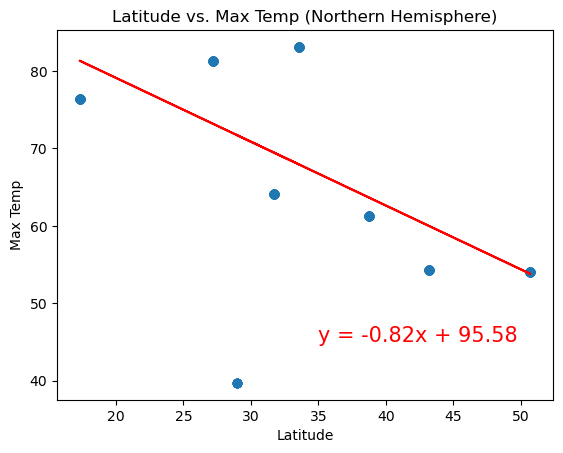

In [79]:
# Linear regression on Northern Hemisphere
lnreg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], (35,45), "Max Temp", "Latitude vs. Max Temp (Northern Hemisphere)", "Northern Hemisphere Max Temp.png")

The r-squared is: 0.7796748977537805


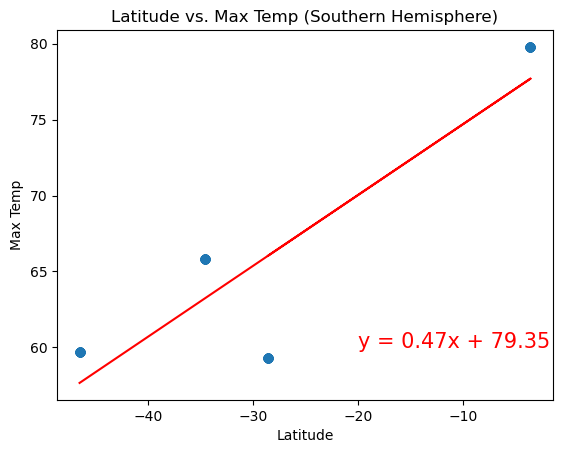

In [77]:
# Linear regression on Southern Hemisphere
lnreg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], (-20,60), "Max Temp", "Latitude vs. Max Temp (Southern Hemisphere)", "Southern Hemisphere Max Temp.png")

**Discussion about the linear relationship:** It appears that the Northern Hemisphere has a moderate negative correlation. In the Northern Hemisphere as the latiture increases, the maximum temperature decreases. The Southern Hemisphere has a strong positive correlation. This means as latitude increases, max temperature increases.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.17850516833724236


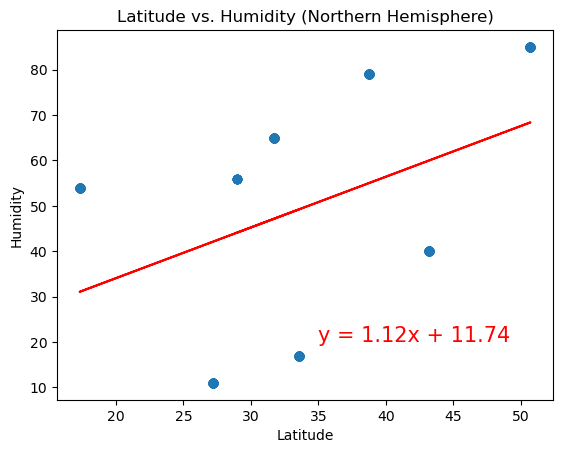

In [76]:
# Northern Hemisphere
lnreg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (35,20), "Humidity", "Latitude vs. Humidity (Northern Hemisphere)", "Northern Hemisphere Humidity.png")

The r-squared is: 0.2376705678179513


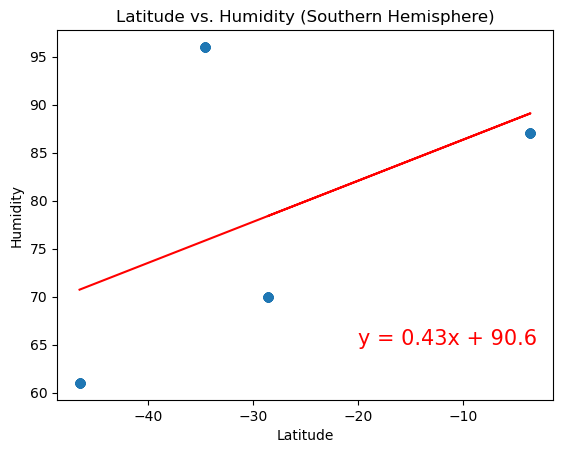

In [73]:
# Southern Hemisphere
lnreg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (-20,65), "Humidity", "Latitude vs. Humidity (Southern Hemisphere)", "Southern Hemisphere Humidity.png")

**Discussion about the linear relationship:** It appears both the Nothern and Southern Hemispheres has weak positive correlations. The Southern hemisphere is slightly stronger. For both the Northern and Southern Hemispheres as the latitude increases, the humidity increases as well. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04580422914753714


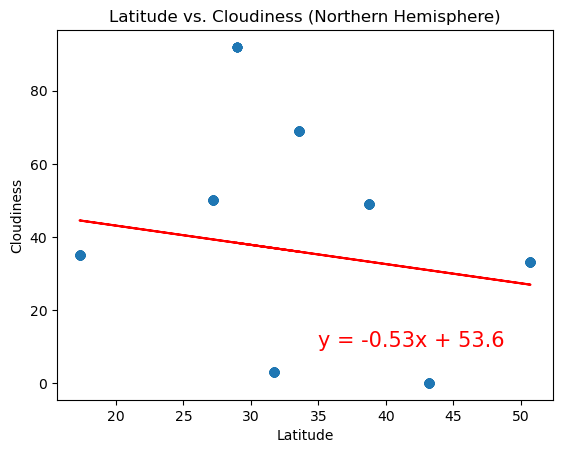

In [83]:
# Northern Hemisphere
lnreg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (35,10), "Cloudiness", "Latitude vs. Cloudiness (Northern Hemisphere)", "Northern Hemisphere Cloudiness.png")

The r-squared is: 0.27172442228442806


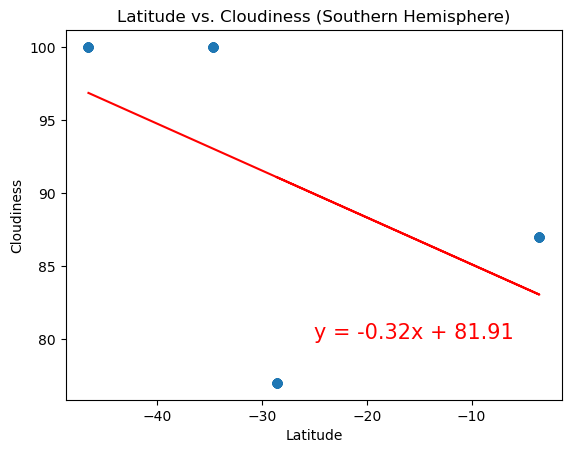

In [87]:
# Southern Hemisphere
lnreg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (-25,80), "Cloudiness", "Latitude vs. Cloudiness (Southern Hemisphere)", "Southern Hemisphere Cloudiness.png")

**Discussion about the linear relationship:** There is almost no correlation in the Northern Hemisphere, slightly negative. For the Northern Hemisphere as the latitude increases, there is no clear direction for whether the cloudiness will increase or decrease. There is a weak negative correlation for the Southern Hemisphere. As the latitude increases, the cloudiness decreases. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.09514663849116393


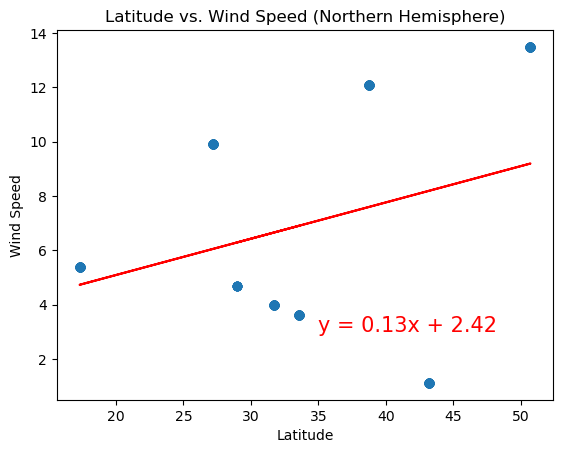

In [88]:
# Northern Hemisphere
lnreg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (35,3), "Wind Speed", "Latitude vs. Wind Speed (Northern Hemisphere)", "Northern Hemisphere Wind Speed.png")

The r-squared is: 0.07289745671315728


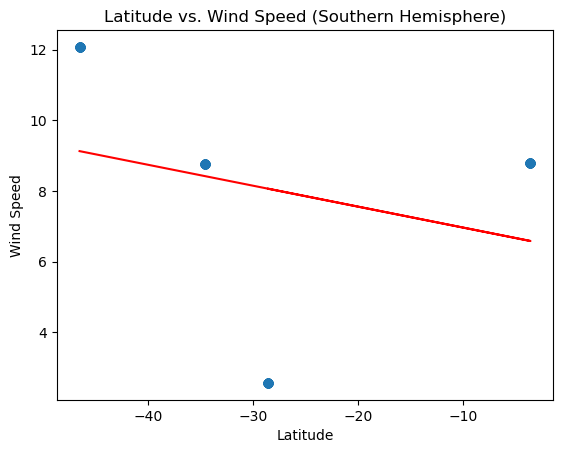

In [48]:
# Southern Hemisphere
lnreg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (-20,5), "Wind Speed", "Latitude vs. Wind Speed (Southern Hemisphere)", "Southern Hemisphere Wind Speed.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE